<a href="https://colab.research.google.com/github/sr-sid1/Machine-Learning-Homework-1/blob/master/Siddhant_Rai_Gas_Forecast_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data_to_load = files.upload()

Saving PET_PRI_GND_A_EPMR_PTE_DPGAL_W.xls to PET_PRI_GND_A_EPMR_PTE_DPGAL_W.xls


In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import tree
import io
from google.colab import files
import pandas as pd

In [ ]:
Gas_Region = pd.read_excel('PET_PRI_GND_A_EPMR_PTE_DPGAL_W.xls', sheet_name=2, skiprows=2)


In [ ]:
Gas_Region.head()

,Date,Weekly East Coast Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly New England (PADD 1A) Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Central Atlantic (PADD 1B) Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Lower Atlantic (PADD 1C) Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Midwest Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Gulf Coast Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Rocky Mountain Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly West Coast Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly West Coast (PADD 5) Except California Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)
0,1992-05-11,1.071,NaN,NaN,NaN,1.103,1.084,1.117,1.189,NaN
1,1992-05-18,1.085,NaN,NaN,NaN,1.118,1.095,1.169,1.208,NaN
2,1992-05-25,1.092,NaN,NaN,NaN,1.117,1.094,1.159,1.218,NaN
3,1992-06-01,1.100,NaN,NaN,NaN,1.122,1.108,1.155,1.228,NaN
4,1992-06-08,1.114,NaN,NaN,NaN,1.137,1.120,1.178,1.246,NaN


In [ ]:
Gas_Region= Gas_Region.fillna(0)

In [ ]:
Gas_Region = Gas_Region.drop(Gas_Region.columns[9],axis=1)

In [ ]:
Gas_Region.head()

,Date,Weekly East Coast Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly New England (PADD 1A) Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Central Atlantic (PADD 1B) Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Lower Atlantic (PADD 1C) Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Midwest Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Gulf Coast Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Rocky Mountain Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly West Coast Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)
0,1992-05-11,1.071,0.0,0.0,0.0,1.103,1.084,1.117,1.189
1,1992-05-18,1.085,0.0,0.0,0.0,1.118,1.095,1.169,1.208
2,1992-05-25,1.092,0.0,0.0,0.0,1.117,1.094,1.159,1.218
3,1992-06-01,1.100,0.0,0.0,0.0,1.122,1.108,1.155,1.228
4,1992-06-08,1.114,0.0,0.0,0.0,1.137,1.120,1.178,1.246


In [ ]:
Gas_Region.columns = ['Date', 'East Coast', 'New England','Central Atlantic','Lower Atlantic','Midwest','Gulf Coast','Rocky Mountain','West Coast']

In [ ]:
Gas_Region

,Date,East Coast,New England,Central Atlantic,Lower Atlantic,Midwest,Gulf Coast,Rocky Mountain,West Coast
0,1992-05-11,1.071,0.000,0.000,0.000,1.103,1.084,1.117,1.189
1,1992-05-18,1.085,0.000,0.000,0.000,1.118,1.095,1.169,1.208
2,1992-05-25,1.092,0.000,0.000,0.000,1.117,1.094,1.159,1.218
3,1992-06-01,1.100,0.000,0.000,0.000,1.122,1.108,1.155,1.228
4,1992-06-08,1.114,0.000,0.000,0.000,1.137,1.120,1.178,1.246
...,...,...,...,...,...,...,...,...,...
1560,2022-04-04,4.045,4.094,4.153,3.965,3.972,3.815,4.144,5.218
1561,2022-04-11,3.966,4.033,4.085,3.874,3.892,3.732,4.144,5.139
1562,2022-04-18,3.926,3.993,4.059,3.825,3.876,3.733,4.148,5.095
1563,2022-04-25,3.981,4.063,4.123,3.870,3.919,3.792,4.188,5.083


## Plot Sublpots


In [ ]:
Gas = Gas_Region.melt(id_vars = 'Date', value_name = 'Gas')
Gas.head()

,Date,variable,Gas
0,1992-05-11,East Coast,1.071
1,1992-05-18,East Coast,1.085
2,1992-05-25,East Coast,1.092
3,1992-06-01,East Coast,1.100
4,1992-06-08,East Coast,1.114


In [ ]:
Gas = Gas.rename(columns = {'variable':'Region'})
Gas.head()

,Date,Region,Gas
0,1992-05-11,East Coast,1.071
1,1992-05-18,East Coast,1.085
2,1992-05-25,East Coast,1.092
3,1992-06-01,East Coast,1.100
4,1992-06-08,East Coast,1.114


In [ ]:
Lates = Gas.Date >'2020-01-01'
Gas = Gas.loc[Lates]

In [ ]:
Gas.head()

,Date,Region,Gas
1443,2020-01-06,East Coast,2.539
1444,2020-01-13,East Coast,2.519
1445,2020-01-20,East Coast,2.496
1446,2020-01-27,East Coast,2.450
1447,2020-02-03,East Coast,2.393


In [ ]:
Gas.tail()

,Date,Region,Gas
12515,2022-04-04,West Coast,5.218
12516,2022-04-11,West Coast,5.139
12517,2022-04-18,West Coast,5.095
12518,2022-04-25,West Coast,5.083
12519,2022-05-02,West Coast,5.099


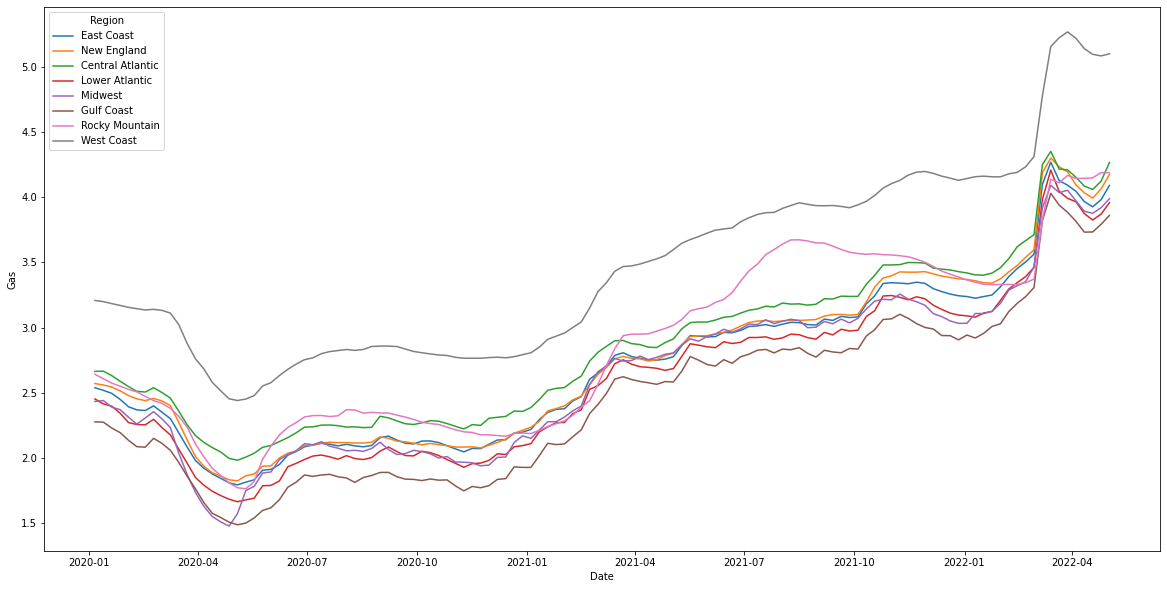

In [ ]:
plt.figure(figsize = (20,10))
sns.lineplot(x= 'Date', y='Gas',hue='Region', data= Gas)


In [ ]:
Lates = Gas.Date >'2022-01-01'
Gas_2 = Gas.loc[Lates]

In [ ]:
import matplotlib.dates as mdates

### Gas Prices Since Ukraine War for United State Regions

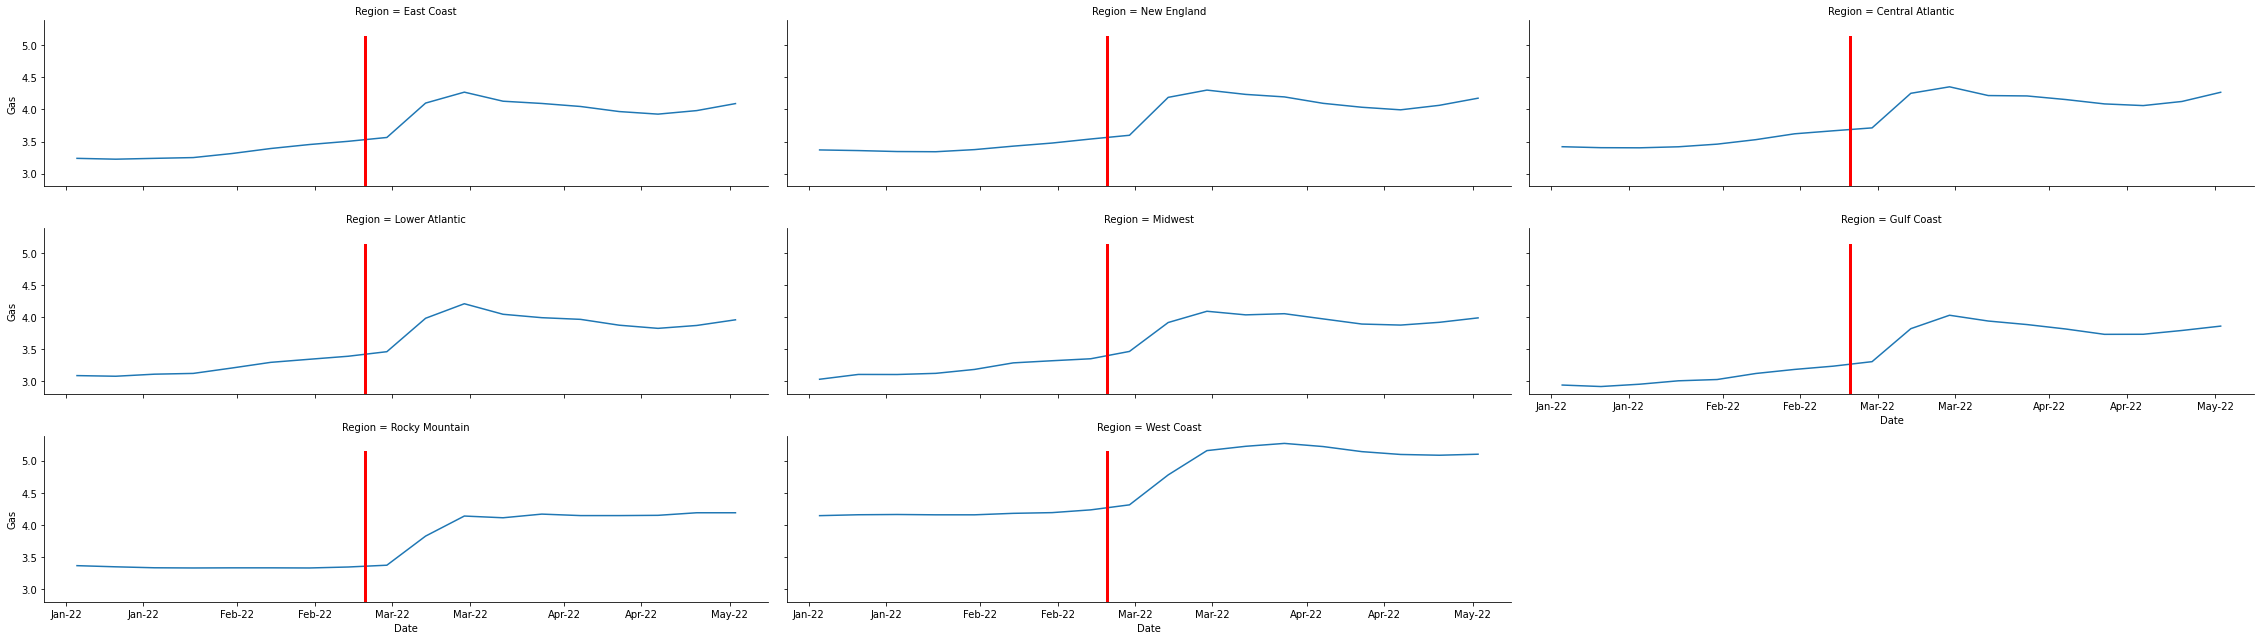

In [ ]:

#Gas Prices since Ukraine War 
x = sns.FacetGrid(data=Gas_2, col='Region', col_wrap=3, aspect =3.5)
x.map(sns.lineplot, 'Date','Gas')
xformatter = mdates.DateFormatter("%b-%y")
x.axes[0].xaxis.set_major_formatter(xformatter)


x.axes[0].axvline(x= [datetime(2022,2,24)],ymin=0,ymax=0.9, c="red", ls='-', linewidth=3)
x.axes[1].axvline(x= [datetime(2022,2,24)],ymin=0,ymax=0.9, c="red", ls='-', linewidth=3)
x.axes[2].axvline(x= [datetime(2022,2,24)],ymin=0,ymax=0.9, c="red", ls='-', linewidth=3)
x.axes[3].axvline(x= [datetime(2022,2,24)],ymin=0,ymax=0.9, c="red", ls='-', linewidth=3)
x.axes[4].axvline(x= [datetime(2022,2,24)],ymin=0,ymax=0.9, c="red", ls='-', linewidth=3)
x.axes[5].axvline(x= [datetime(2022,2,24)],ymin=0,ymax=0.9, c="red", ls='-', linewidth=3)
x.axes[6].axvline(x= [datetime(2022,2,24)],ymin=0,ymax=0.9, c="red", ls='-', linewidth=3)
x.axes[7].axvline(x= [datetime(2022,2,24)],ymin=0,ymax=0.9, c="red", ls='-', linewidth=3)

## Gas Aggregate

In [ ]:
Gas_Aggregate = pd.read_excel('PET_PRI_GND_A_EPMR_PTE_DPGAL_W.xls', sheet_name=1, skiprows=2)

In [ ]:
Gas_Aggregate.head()

,Date,Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)
0,1990-08-20,1.191
1,1990-08-27,1.245
2,1990-09-03,1.242
3,1990-09-10,1.252
4,1990-09-17,1.266


In [ ]:
Gas_Aggregate['Date'] = pd.to_datetime (Gas_Aggregate['Date'])
 

In [ ]:
Gas_Aggregate.tail()

,Date,Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)
1650,2022-04-04,4.170
1651,2022-04-11,4.091
1652,2022-04-18,4.066
1653,2022-04-25,4.107
1654,2022-05-02,4.182


In [ ]:
 Gas_Aggregate = Gas_Aggregate.rename(columns={Gas_Aggregate.columns[1]: 'Weekly Gasoline Prices'})


In [ ]:
New = Gas_Aggregate.Date >'2020-01-01'
Gas_Aggregate = Gas_Aggregate.loc[New]

In [ ]:
Gas_Aggregate.head()

,Date,Weekly Gasoline Prices
1533,2020-01-06,2.578
1534,2020-01-13,2.570
1535,2020-01-20,2.537
1536,2020-01-27,2.506
1537,2020-02-03,2.455


In [ ]:
import matplotlib.pyplot as plt

Text(-35, 5, 'Russia Declares War ')

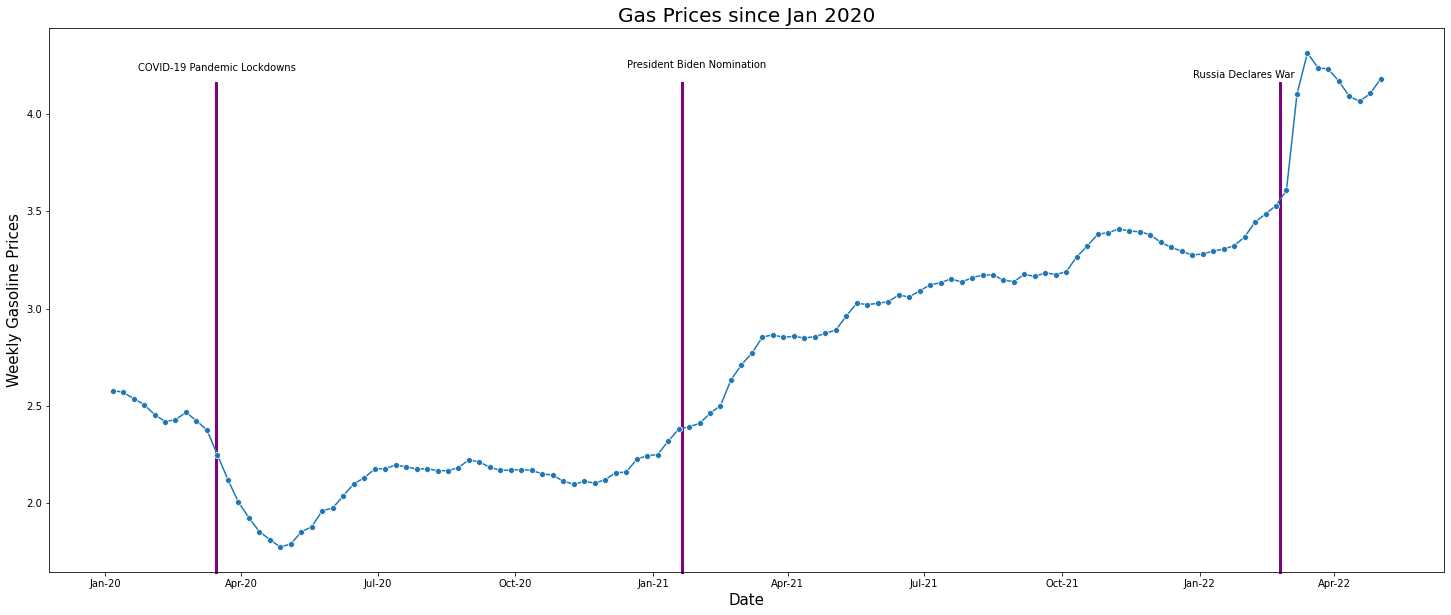

In [ ]:
import seaborn as sns
from matplotlib  import dates

fig, ax = plt.subplots(figsize = (25,10))
Graph = sns.lineplot(x ='Date', y='Weekly Gasoline Prices', data= Gas_Aggregate, ax=ax, marker = 'o')
ax.xaxis.set_major_formatter(dates.DateFormatter("%b-%y"))

ax.set_title('Gas Prices since Jan 2020', fontsize= 20)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Weekly Gasoline Prices', fontsize=15)

ax.axvline(x= datetime(2020,3,15),ymin=0,ymax=0.9, c="purple", ls='-', linewidth=3, zorder=0, clip_on=False,  label = 'COVID')
ax.axvline(x= datetime(2022,2,24),ymin=0,ymax=0.9, c="purple", ls='-', linewidth=3 ,zorder=0, clip_on=False)
ax.axvline(x= [datetime(2021,1,20)],ymin=0,ymax=0.9, c="purple", ls='-', linewidth=3 ,zorder=0, clip_on=False)

ax.annotate('COVID-19 Pandemic Lockdowns', xy=(datetime(2020,3,15), 4.2), xytext=(1, 1.8), textcoords='offset points',
             rotation=0, va='bottom', ha='center', annotation_clip=False )

ax.annotate('President Biden Nomination', xy=(datetime(2021,1,20),4.2 ), xytext=(15, 5), textcoords='offset points',
             rotation=0, va='bottom', ha='center', annotation_clip=False )
ax.annotate('Russia Declares War ', xy=(datetime(2022,2,24),4.15 ), xytext=(-35, 5), textcoords='offset points',
             rotation=0, va='bottom', ha='center', annotation_clip=False )





## Times Series Anaylsis & Additive Model

In [ ]:
from fbprophet import Prophet

In [ ]:
model = Prophet(interval_width=0.95, seasonality_mode= 'additive')

In [ ]:
# New data
fb_data =Gas_Aggregate.copy()
fb_data.rename(columns={"Date":"ds", "Weekly Gasoline Prices":"y"}, inplace=True)
fb_data.head()

,ds,y
1533,2020-01-06,2.578
1534,2020-01-13,2.570
1535,2020-01-20,2.537
1536,2020-01-27,2.506
1537,2020-02-03,2.455


In [ ]:
model.fit(fb_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_dates = model.make_future_dataframe(periods=53, freq = 'W')


In [ ]:
future_dates.tail(10)

,ds
165,2023-03-05
166,2023-03-12
167,2023-03-19
168,2023-03-26
169,2023-04-02
170,2023-04-09
171,2023-04-16
172,2023-04-23
173,2023-04-30
174,2023-05-07


In [ ]:
forecast = model.predict(future_dates)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
170,2023-04-09,5.304773,4.382433,6.364708,4.338182,6.273411,0.067878,0.067878,0.067878,0.067878,0.067878,0.067878,0.0,0.0,0.0,5.372651
171,2023-04-16,5.330525,4.354365,6.398499,4.330265,6.335503,0.043364,0.043364,0.043364,0.043364,0.043364,0.043364,0.0,0.0,0.0,5.373889
172,2023-04-23,5.356276,4.359097,6.444894,4.326186,6.398361,0.038173,0.038173,0.038173,0.038173,0.038173,0.038173,0.0,0.0,0.0,5.394450
173,2023-04-30,5.382028,4.361326,6.517537,4.313028,6.461218,0.044847,0.044847,0.044847,0.044847,0.044847,0.044847,0.0,0.0,0.0,5.426876
174,2023-05-07,5.407780,4.365203,6.586150,4.307043,6.522907,0.063594,0.063594,0.063594,0.063594,0.063594,0.063594,0.0,0.0,0.0,5.471374


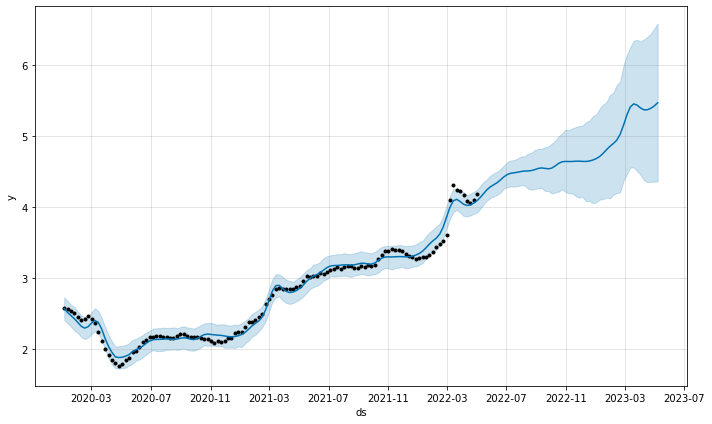

In [ ]:
model.plot(forecast, uncertainty=True);

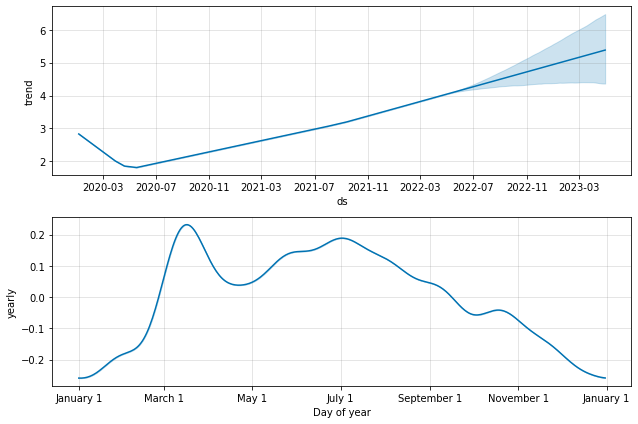

In [ ]:
model.plot_components(forecast);

## Autocorrelation & Decomoposition

In [ ]:
autocorrelation_lag1 = Gas_Aggregate['Weekly Gasoline Prices'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

autocorrelation_lag3 = Gas_Aggregate['Weekly Gasoline Prices'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = Gas_Aggregate['Weekly Gasoline Prices'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = Gas_Aggregate['Weekly Gasoline Prices'].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

One Month Lag:  0.9951195062815545
Three Month Lag:  0.9728791039175987
Six Month Lag:  0.9309028310038931
Nine Month Lag:  0.8894961681452754


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


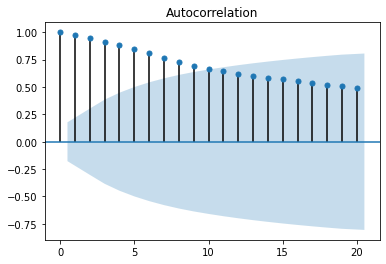

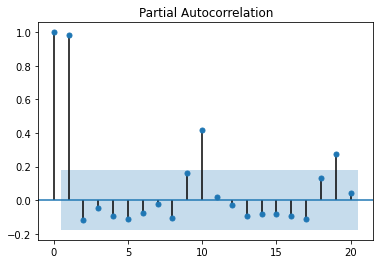

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(Gas_Aggregate['Weekly Gasoline Prices'], lags=20)
plot_pacf(Gas_Aggregate['Weekly Gasoline Prices'], lags=20);

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df =Gas_Aggregate.set_index(['Date'])
df

,Weekly Gasoline Prices
Date,
2020-01-06,2.578
2020-01-13,2.570
2020-01-20,2.537
2020-01-27,2.506
2020-02-03,2.455
...,...
2022-04-04,4.170
2022-04-11,4.091
2022-04-18,4.066


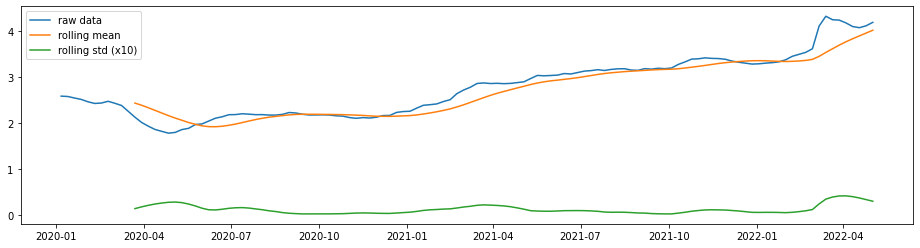

In [ ]:
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

test_stationarity(df['Weekly Gasoline Prices'],'raw data')

In [ ]:
from statsmodels.tsa.stattools import adfuller

adft = adfuller(df['Weekly Gasoline Prices'] ,autolag="AIC")

output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)


       Values                       Metric
0    0.578856              Test Statistics
1    0.987083                      p-value
2    2.000000             No. of lags used
3  119.000000  Number of observations used
4   -3.486535          critical value (1%)
5   -2.886151          critical value (5%)
6   -2.579896         critical value (10%)


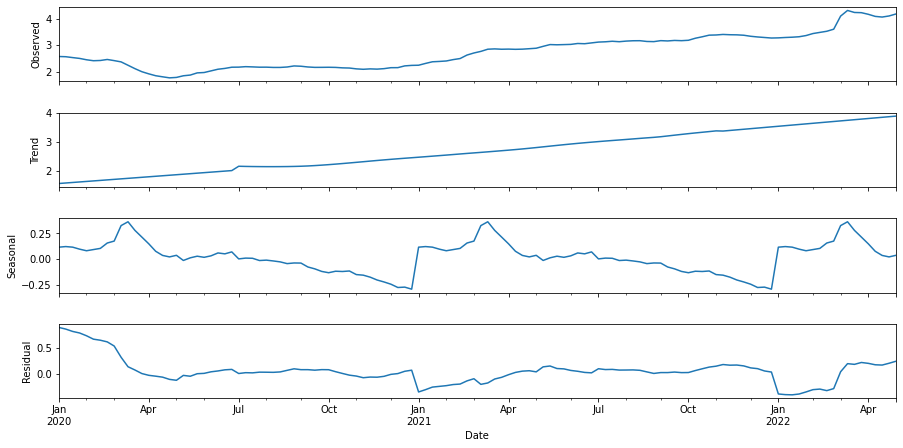

In [ ]:
import statsmodels.api as sm
def seasonal_decompose (x):
    decomposition = sm.tsa.seasonal_decompose(x, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

seasonal_decompose(df)

## Train/Test Model for West Coast


In [ ]:
df = Gas_Region.drop(['Date'],axis=1)

In [ ]:
df

,East Coast,New England,Central Atlantic,Lower Atlantic,Midwest,Gulf Coast,Rocky Mountain,West Coast
0,1.071,0.000,0.000,0.000,1.103,1.084,1.117,1.189
1,1.085,0.000,0.000,0.000,1.118,1.095,1.169,1.208
2,1.092,0.000,0.000,0.000,1.117,1.094,1.159,1.218
3,1.100,0.000,0.000,0.000,1.122,1.108,1.155,1.228
4,1.114,0.000,0.000,0.000,1.137,1.120,1.178,1.246
...,...,...,...,...,...,...,...,...
1560,4.045,4.094,4.153,3.965,3.972,3.815,4.144,5.218
1561,3.966,4.033,4.085,3.874,3.892,3.732,4.144,5.139
1562,3.926,3.993,4.059,3.825,3.876,3.733,4.148,5.095
1563,3.981,4.063,4.123,3.870,3.919,3.792,4.188,5.083


In [ ]:
y = df['West Coast']
X = df.drop('West Coast',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


## Linear Regression Model

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(X)
X.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,East Coast,New England,Central Atlantic,Lower Atlantic,Midwest,Gulf Coast,Rocky Mountain
0,1.0,1.071,0.0,0.0,0.0,1.103,1.084,1.117
1,1.0,1.085,0.0,0.0,0.0,1.118,1.095,1.169
2,1.0,1.092,0.0,0.0,0.0,1.117,1.094,1.159
3,1.0,1.100,0.0,0.0,0.0,1.122,1.108,1.155
4,1.0,1.114,0.0,0.0,0.0,1.137,1.120,1.178


In [ ]:
regression_model = sm.OLS(y,X)
results = regression_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             West Coast   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 1.583e+04
Date:                Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:46:42   Log-Likelihood:                 1117.1
No. Observations:                1565   AIC:                            -2218.
Df Residuals:                    1557   BIC:                            -2175.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0051      0.011  

In [ ]:
sum = df.sum()
sum

East Coast          3354.870
New England         3388.366
Central Atlantic    3401.106
Lower Atlantic      3217.307
Midwest             3310.814
Gulf Coast          3175.476
Rocky Mountain      3409.117
West Coast          3840.338
dtype: float64

In [ ]:

sum = pd.DataFrame(sum)

In [ ]:
sum.index.names = ['Regions']
sum

,0
Regions,
East Coast,3354.870
New England,3388.366
Central Atlantic,3401.106
Lower Atlantic,3217.307
Midwest,3310.814
Gulf Coast,3175.476
Rocky Mountain,3409.117
West Coast,3840.338


In [ ]:
sum = sum.rename(columns={sum.columns[0]: 'Gas Prices'}).reset_index()

In [ ]:
sum = sum.sort_values(by = 'Gas Prices')

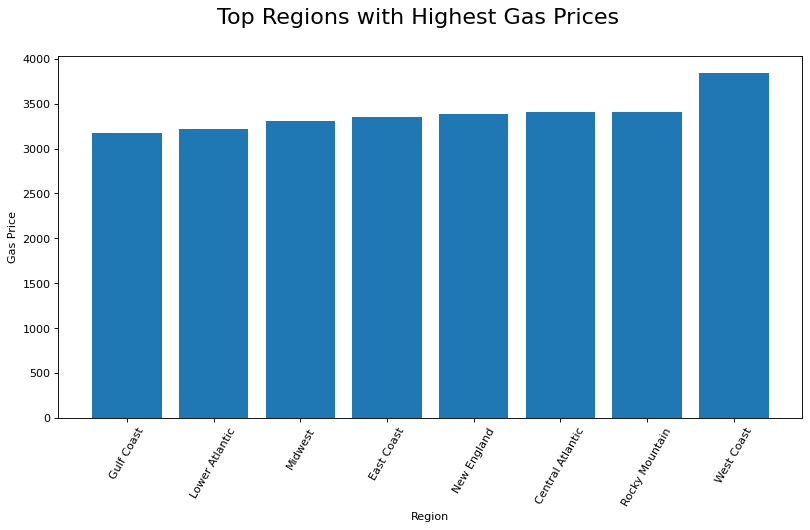

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
fig = figure( figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

plt.bar(sum.Regions, sum['Gas Prices'])
plt.xticks(rotation=60)
fig.suptitle('Top Regions with Highest Gas Prices', fontsize=20)
plt.xlabel('Region')
plt.ylabel('Gas Price')            
plt.show()
